<a href="https://colab.research.google.com/github/filopacio/Cardio-NN-Classification-/blob/main/cardio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's import relevant packages

In [1]:
import tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
url = 'https://github.com/filopacio/Cardio-NN-Classification-/blob/main/cardio.xls?raw=true'
cardio = pd.read_excel(url)
cardio

,id,event,timev,totchol,age,sysbp,cursmoke,bmi,diabetes,glucose,prevhyp,sex
0,6312149,Yes,11.082820,175.0,58,83.5,Yes,29.66,No,115.0,No,Male
1,8291170,No,5.363450,168.0,35,83.5,Yes,16.71,No,63.0,No,Female
2,8460794,No,24.000000,190.0,39,85.0,Yes,22.43,No,60.0,No,Female
3,4690988,No,4.344969,260.0,58,85.5,No,20.76,Yes,206.0,No,Female
4,6858147,No,24.000000,224.0,38,90.0,Yes,18.18,No,57.0,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
4429,2108588,Yes,0.000000,206.0,62,242.0,Yes,39.86,No,94.0,Yes,Female
4430,2754554,No,24.000000,169.0,48,243.0,No,28.49,No,77.0,Yes,Female
4431,1940697,No,12.826831,264.0,59,244.0,No,19.61,No,120.0,Yes,Female
4432,8303090,Yes,8.613278,298.0,62,248.0,No,37.10,No,77.0,Yes,Female


In [ ]:
cardio.info()
cardio.describe()
cardio.isna().sum()
len(cardio)
cardio = cardio.dropna()
len(cardio)

cardio = pd.get_dummies(cardio)
cardio = cardio.drop(['event_No','cursmoke_No', 'diabetes_No', 'prevhyp_No', 'sex_Female'], axis = 1)

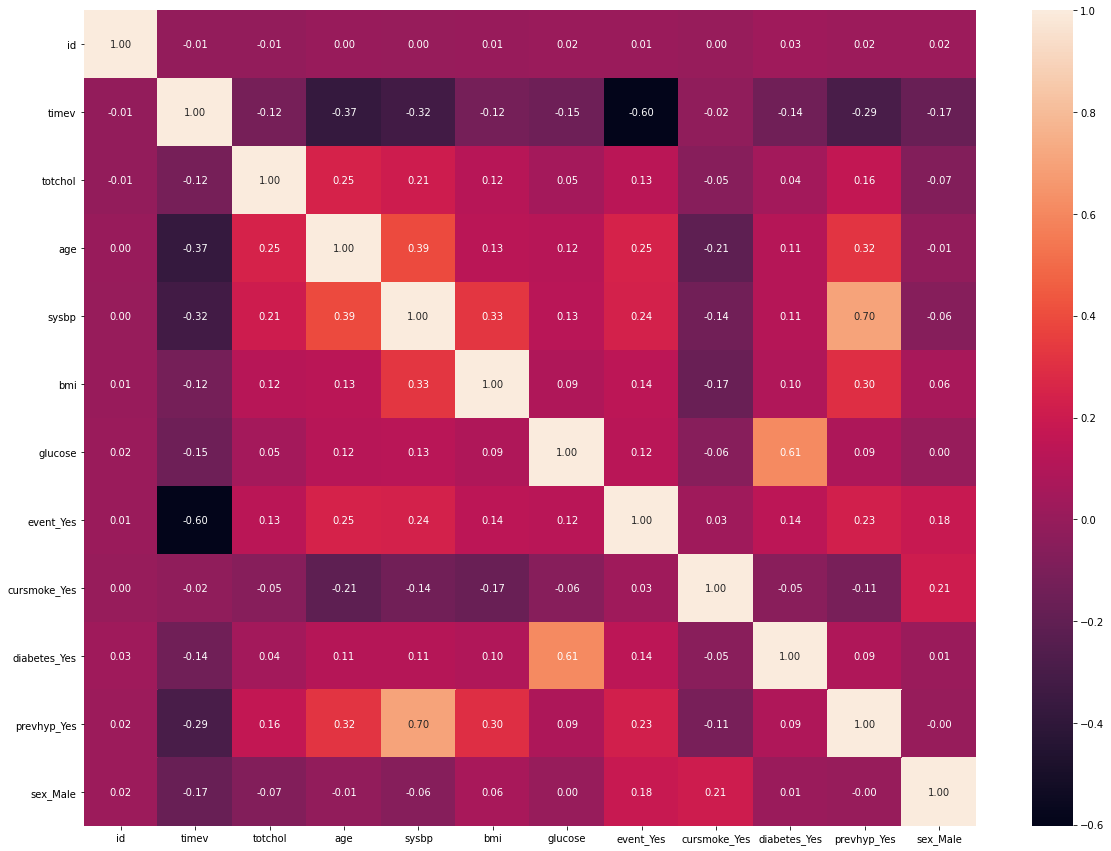

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(cardio.corr(), annot=True,fmt='.2f')
plt.show()

In [7]:
X = cardio.drop(['event_Yes','id'],axis=1).values
y = cardio['event_Yes'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [8]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [29]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1]))
model.add(Dense(12, activation= 'tanh'))
model.add(Dense(6, activation= 'tanh'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, epochs=500, batch_size=400)

Epoch 1/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8362
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8380
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8373
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8370
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3193 - accuracy: 0.8370
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8370
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.8366
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8352
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8341
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8345
Epoch 11/500
8/8 [===========

In [35]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss of test set: %.4f" % loss)
print("Accuracy of test set: %.4f" % acc)

38/38 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8281
Loss of test set: 0.3326
Accuracy of test set: 0.8281


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


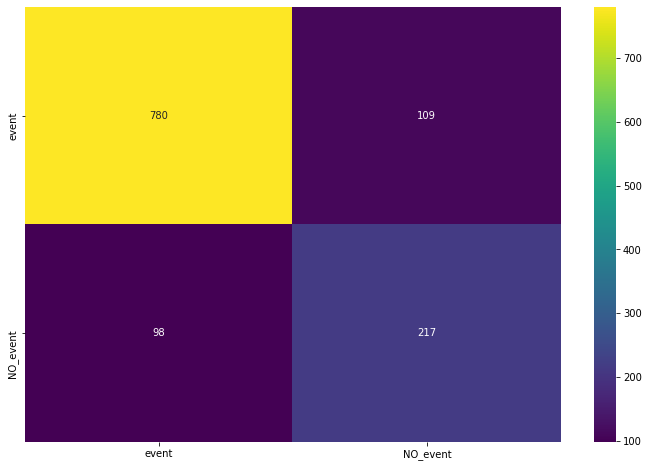

In [43]:
plt.figure(figsize=(12,8))
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['event','NO_event']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');
plt.show()

In [47]:
from sklearn import linear_model

In [50]:
lr = linear_model.LogisticRegression(random_state=0, )

In [62]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = lr.predict(X_test)

In [71]:
lr.score(X_test, y_test)

0.8205980066445183

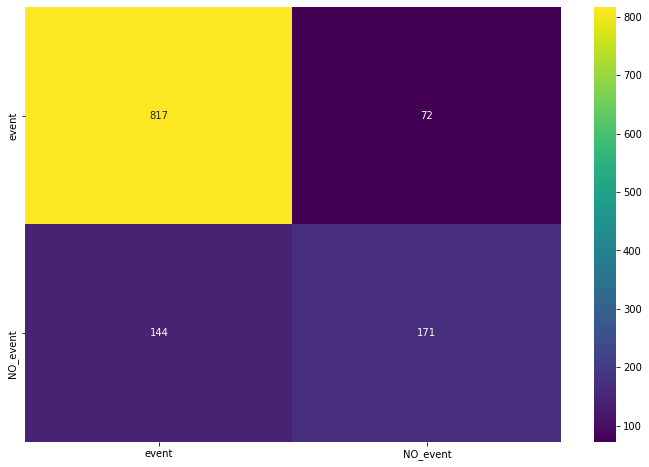

In [72]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
labels = ['event','NO_event']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');
plt.show()

In [60]:
from sklearn import tree

In [67]:
ct = tree.DecisionTreeClassifier()

In [ ]:
ct.fit(X_train,y_train)

In [73]:
y_pred = ct.predict(X_test)

In [75]:
ct.score(X_test,y_test)

0.7990033222591362

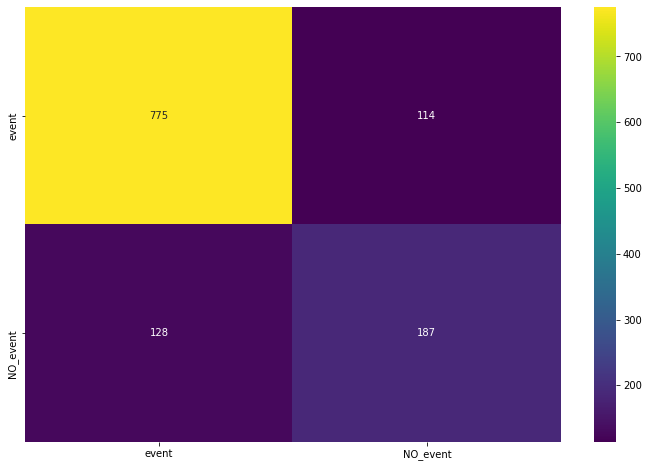

In [74]:
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)
labels = ['event','NO_event']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');
plt.show()